# Wave propagation in Frequency Domain

In this section we discuss how to solve the PDE for 2D sonic wave equation in frequency domain using `esys.escript`. It is assumed that you have worked through the [introduction section on `esys.escript`](escriptBasics.ipynb). 
First we will provide the basic theory.



## Sonic Wave Equation in Frequency domain

The sonic wave equation in frequency domain is given as 
\begin{equation}\label{eqWAVEF1}
\mathbf{V} = - \nabla u = -\begin{bmatrix}
\frac{\partial u}{\partial x_0 }\\
 \frac{\partial u}{\partial x_1 }
\end{bmatrix}
\end{equation}
\begin{equation}\label{eqWAVEF2}
\frac{\partial V_0}{\partial x_0 }+
 \frac{\partial V_1}{\partial x_1 } - k^2 u = \delta_{\mathbf{x}_s} \mbox{ with } k= \frac{\omega}{c}
\end{equation}
where $u$ is the power amplitude for angular frequency $\omega$ 
and source at location $\mathbf{x}_s$. $c$ is the wave propagation speed.

A PML layer of thickness $L_{pml}$ is introduced to remove reflections from the boundary.
For this we set 
\begin{equation}\label{eqPMLGamma}
\gamma_i = 1 -\mathbf{j} \frac{S_{pml}}{k} Q_i
\end{equation}
where $S_{pml}$ is absorption strength parameter and $Q_i$ are the absorbing functions.
Horizontal absorption is applied near the left ($x_0=0$) and right boundary ($x_0=L_0=3km$):
\begin{equation}\label{EQQ0}
Q_0(\mathbf{x}) = \begin{cases}
= \left( \frac{L_{pml}-x_0}{L_{pml}} \right)^{M_{pml}} & \mbox{ if } 0 \le x_0 \le L_{pml}\\
= \left( \frac{x_0-L_0+L_{pml}}{L_{pml}} \right)^{M_{pml}} & \mbox{ if } L_0-L_{pml} \le x_0 \le L_0 \\
=0  & \mbox{ otherwise  }
\end{cases} 
\end{equation}
while vertical absorption is applied near the bottom ($x_0=1$) only: 
\begin{equation}\label{EQQ1}
Q_1(\mathbf{x}) = \begin{cases}
= \left( \frac{L_{pml}-x_1}{L_{pml}} \right)^{M_{pml}} & \mbox{ if } 0 \le x_1 \le L_{pml}\\
=0  & \mbox{ otherwise  }
\end{cases} 
\end{equation}
With the variable transformation $x_i \rightarrow \gamma_i x_i$ equations
\eqref{eqWAVEF1} and \eqref{eqWAVEF2} are transfered to 
\begin{equation}\label{eqWAVEF1PML}
\mathbf{V} = - \nabla u = -\begin{bmatrix}
\frac{1}{\gamma_0}\frac{\partial u}{\partial x_0 }\\
\frac{1}{\gamma_1} \frac{\partial u}{\partial x_1 }
\end{bmatrix}
\end{equation}
\begin{equation}\label{eqWAVEF2PML}
\frac{1}{\gamma_0}\frac{\partial V_0}{\partial x_0 }+
\frac{1}{\gamma_1} \frac{\partial V_1}{\partial x_1 } - k^2 u = \delta_{\mathbf{x}_s}
\end{equation}


## The PDE in `esys.escript`

The conservation equation in `esys.escript` is
\begin{equation}\label{eqEE1}
\frac{\partial F_0}{\partial x_0 }+
 \frac{\partial F_1}{\partial x_1 } D u = Y + y_{dirac}
\end{equation}
To match the \eqref{eqWAVEF2PML} we multiply this equations with $\gamma_0 \gamma_1$ 
and use the fact that $\gamma_0$ is not depending on $x_1$ 
and $\gamma_1$ is not depending on $x_0$ to obtain:
\begin{equation}\label{eqWAVEF2PML2}
\frac{\partial \gamma_1 V_0}{\partial x_0 }+
\frac{\partial \gamma_0 V_1}{\partial x_1 } - k^2 \gamma_0 \gamma_1 \; u = \delta_{\mathbf{x}_s}
\end{equation}
We also assume that the source location is not located in the absorption zone and hence
$\delta_{\mathbf{x}_s} \gamma_0 \gamma_1 =\delta_{\mathbf{x}_s}$. Comparison with \eqref{eqEE1}
shows $Y=0$,  $y_{dirac}=\delta_{\mathbf{x}_s}$, $D=- k^2 \gamma_0 \gamma_1$ and
\begin{equation}\label{EQFLUX2}
\mathbf{F} = 
\begin{bmatrix}
 F_0 \\
 F_1
\end{bmatrix}
=
\begin{bmatrix}
  \gamma_1 V_0\\
\gamma_0 V_1
\end{bmatrix}
=
\begin{bmatrix}
 \frac{  \gamma_1}{\gamma_0}\frac{\partial u}{\partial x_0 }\\
 \frac{  \gamma_0}{\gamma_1}\frac{\partial u}{\partial x_1 }
\end{bmatrix}
\end{equation}
Recall the flux $\mathbf{F}$ is related with $\mathbf{\nabla} u$ in the form 
\begin{equation} \label{EQFLUX}
\mathbf{F} = - \mathbf{A} \mathbf{\nabla} u +\mathbf{X}
\end{equation} 
This gives $\mathbf{F}=0$ and
\begin{equation}\label{eqAF}
\begin{bmatrix}
A_{00} & A_{01} \\
A_{10}  & A_{11} 
\end{bmatrix}= 
\begin{bmatrix}
 \frac{  \gamma_1}{\gamma_0}\ & 0  \\
0  &  \frac{  \gamma_0}{\gamma_1}
\end{bmatrix}
\end{equation}

## Domain set up

We consider a single reflector set up. The reflector is located at a depth of $500m$
where the top layer has propagation speed of $c_{top}=1500m/s$ 
and the bottom layer has propagation speed of $c_{top}=3000m/s$.
Use a frequency of $f=5 Hz$. The domain has depth of $1km$ and width $3km$ 
with $300 \times 100$ grid.
The source is located at the surface at an offset of $1500m$ from the boundary.

 <img src="SonicImage1.png" alt="Sonic domain" width="800"> 

In [1]:
Width=3000       # m
Ne0=300          # number of cells along the horizontal axis  
Depth=1000      # m
Ne1=100          # number of cells along the vertical axis  
c_top=1800      # m/s
c_bottom=3000      # m/s
#%matplotlib notebook

In [2]:
import numpy as np
Omega=2*np.pi*5. # Hz
d0=Depth-500.    # m top layer is 500m thick


As usual we start the model set up with defining the domain. In this application
we also want to use point source. These need to be defined when the domain is 
defined. Here we use a single source named "source66". If several sources are used later 
a list of source locations and name can be defined. As we will see later the names allow to
switch on sources individually. 

In [3]:
sources=  [ (Width/2, Depth) ]
source_names = [ 'source66' ]

We set up the domain including the location and names of potential source locations.

In [4]:
from esys.escript import *
from esys.finley import Rectangle
domain=Rectangle(Ne0, Ne1, l0=Width,l1=Depth, diracPoints=sources,  diracTags=source_names)

To define the propagation speed `c` a mask `m` is introduced distinguishing between the top layer (value one)
and the bottom layer (value zero). 
The propagation speed is defined at integration points in the elements.

In [5]:
X=Function(domain).getX()
m=wherePositive(X[1]-d0)
c=c_top*m+c_bottom*(1-m)

Now we can set

In [6]:
k=Omega/c

## PML 

To minimize reflection from the boundary we introduce the PML conditions.
The key step is to introduce the absorbing functions $Q_i$. 
We start with the vertical  absorbing functions $Q_1$ which is defined by  \eqref{EQQ1}.
$Q_1$ is defined at the numerical integration points.

In [7]:
Lpml=200
Mpml=3
Spml=1

`Q1` is build as a product of the monomial part $\left( \frac{L_{pml}-x_1}{L_{pml}} \right)^{M_{pml}}$
and a mask that makes sure that the monomial part is applied in the layer of thickness $L_{pml}$ near the bottom 
boundary only:

In [8]:
X=Function(domain).getX()
Q1=wherePositive(Lpml-X[1])*((Lpml-X[1])/Lpml)**Mpml 
gamma1=1-1j*Spml/k*Q1

Similarly in the horizontal direction:

In [9]:
X=Function(domain).getX()
Q0_l=wherePositive(Lpml-X[0])*((Lpml-X[0])/Lpml)**Mpml
Q0_r=wherePositive(X[0]-(Width-Lpml))*((X[0]-(Width-Lpml))/Lpml)**Mpml
gamma0=1-1j*Spml/k*(Q0_l+Q0_r) 

Let's make sure the Q's are set up correctly and take a look at the distribution. To reduce rendering time
we interpolate to element centers first.

In [10]:
Q=interpolate(Q1+Q0_l+Q0_r, ReducedFunction(domain))
Q_np=convertToNumpy(Q)
x_np=convertToNumpy(Q.getFunctionSpace().getX())

import matplotlib.pyplot as plt
plt.figure(figsize=(9,3))
plt.tricontourf(x_np[0], x_np[1], Q_np[0], 15)
plt.xlabel('x0 [m]')
plt.ylabel('x1 [m]')
plt.title("Absorbing Function Q")
plt.colorbar()

## Definition of the PDE

Now we are ready to set-up the PDE. As the PML coefficient has complex values we need to set up the PDE
as a complex PDE. Also we use the direct solver which is the better choice for this PDE.

In [11]:
from esys.escript.linearPDEs import LinearSinglePDE, SolverOptions

pde=LinearSinglePDE(domain, isComplex=True)
pde.getSolverOptions().setSolverMethod(SolverOptions.DIRECT)

We setting the coefficient `A` following \eqref{eqAF}. We use the 
`Tensor` function to create $2 \times 2$ matrix for each integration point. It is initialized with zero (first argument) and we then modify the main diagonal entries according to the PML absorption.

In [12]:
myA=Tensor(0.,Function(domain))
myA[0,0]=gamma1/gamma0
myA[1,1]=gamma0/gamma1

And now we set `A` and `D`. Don't forget the factor `gamma1*gamma0` in `D` according to PML. 

In [13]:
pde.setValue(A=myA, D=-gamma1*gamma0*k**2)

The missing bit is the point source. This is set using a `Data` object with 
the `DiracDeltaFunctions(domain)` attribute. `Data` object with this attribute using the Dirac point 
`diracPoints` and corresponding tags `diracTags` introduced into the `domain` when it was defined. 
The source term - let's call it `src` - is set up in two steps: 
First a `Scalar` `Data` object is created which is linked with the Dirac point is initialized with zero.

In [14]:
src=Scalar(0., DiracDeltaFunctions(domain) )

Then the specific Dirac point labeled "source66" get assigned the value one. Notice that 
other Dirac point are not effected. Here we assign the value `1`:

In [15]:
src.setTaggedValue('source66' , 1.) 

This `src` is now assigned to the `y_dirac` coefficient of the PDE:

In [16]:
pde.setValue(y_dirac=src) 

We are ready to get the solution:

In [17]:
u=pde.getSolution()
print("solution u =", str(u))

solution u = Summary: Lsup=1.38888 data points=30401


Let's see how it looks like:

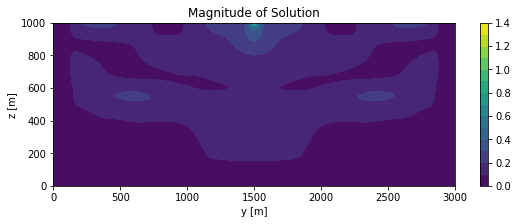

In [18]:
u_np=convertToNumpy(abs(u))
x_np=convertToNumpy(u.getFunctionSpace().getX())

plt.figure(figsize=(9,3))
plt.tricontourf(x_np[0], x_np[1], u_np[0], 15)
plt.xlabel('y [m]')
plt.ylabel('z [m]')
plt.title("Magnitude of Solution")
plt.colorbar()

## Setting  up geophones:

To create a synthetic CDP gather or even run FWI we pick value from $u$ at specific location
simulating a line of geophones. Here we assume that `NGeophone` geophones are located at 
surface stating at offset `Offset` from the left side of the domain. The geophones are assumed to be equally spaced 
with distance `GeophoneSpacing`:

In [19]:
GeophoneSpacing=50
NGeophone=51
Offset=250
Surface=Depth

Let's check is the last geophone is still located in the domain:

In [20]:
assert Offset+GeophoneSpacing * (NGeophone-1) < Width

Set the actual locations of the geophones in the domain:

In [21]:
geophone_locations = [ (Offset+GeophoneSpacing * j, Surface) for j in range(NGeophone) ] 

We use the `Locator` to pick values from the solution `u`:

In [22]:
from esys.escript.pdetools import Locator
geophones=Locator(u.getFunctionSpace(), geophone_locations)
u_at_geophone=geophones.getValue(abs(u))

We get the true offsets of the geophones - just in case ...

In [23]:
geophone_offsets=[ x[0] for x in geophones.getX() ]

And now we can plot the amplitude of `u` along the line of geophones:

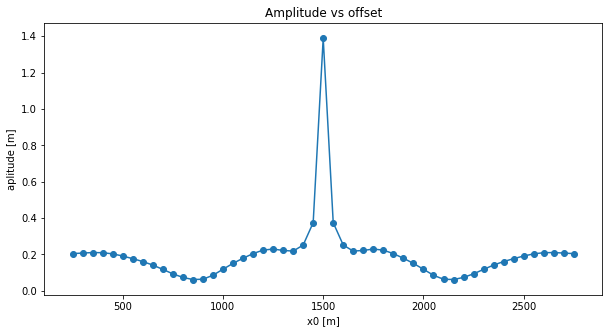

In [24]:
plt.figure(figsize=(10,5))
plt.clf()
plt.plot(geophone_offsets, u_at_geophone)
plt.scatter(geophone_offsets, u_at_geophone)
plt.xlabel('x0 [m]')
plt.ylabel('aplitude [m]')
plt.title("Amplitude vs offset")
plt.savefig("wave.png")